In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import parser 
import reverser

## Running the cutting routine

In [2]:
# #cuts = [1e-02, 1e-03, 1e-04, 1e-05, 1e-06, 1e-07, 1e-08, 1e-09]
# cuts = np.logspace(-1, -10, num=37)
# cuts_naming_bool = False
# # print(cuts)
# no_of_particles, total_scores = parser.cutting_routine(cuts, dir_name="cuts_study/cuts_finer", cut_name=cuts_naming_bool)
# reverser.reverser_routine(cuts, dir_name="cuts_study/cuts_finer", cut_name=cuts_naming_bool)

In [3]:
# dev_score = [(1-x)*100 for x in total_scores]

# fig, ax = plt.subplots(1,2, figsize=(11, 2))
# ax[0].plot(cuts, dev_score, marker='o', linestyle='-', color='b', label='Total Importance Score')
# ax[0].set_xscale('log')
# ax[0].set_yscale('symlog', linthresh=1e-2)
# ax[0].set_ylim(bottom=0, top=50)
# ax[0].set_xlabel('Importance Cutoff')
# ax[0].set_ylabel('Total Importance Score')
# ax[0].set_title('Total Importance Score for all particles in the lists')
# ax[0].tick_params(axis='both', top=True, right=True, direction='in')
# ax[0].grid(True, which='both', linestyle='--', linewidth=0.5)
# ax[0].legend()

# ax[1].plot(cuts, no_of_particles, marker='o', linestyle='-', color='r', label='No. of Particles')
# ax[1].set_xscale('log')
# #ax[1].set_yscale('log')
# ax[1].set_xlabel('Importance Cutoff')
# ax[1].set_ylabel('No. of Particles')
# ax[1].set_title('No. of Particles vs. Importance Cutoff')
# ax[1].tick_params(axis='both', top=True, right=True, direction='in')
# ax[1].grid(True, which='both', linestyle='--', linewidth=0.5)
# ax[1].legend()

# fig.savefig("Plots/importance_cutoff_study_test.png", dpi=300, bbox_inches='tight')

In [4]:
# print(no_of_particles)
# test_list = [4, 4, 6, 7, 9, 20, 26, 44, 53, 82, 116, 164, 204, 251, 305, 355, 409, 468, 507, 541, 569, 589, 607, 616, 621, 629, 633, 637, 637, 637, 638, 639, 640, 641, 641, 641, 641]
# print(test_list)

## General functionality of the parser

In [2]:
# Path to your file
file_path = "decays_PDG2016Plus_massorder_f0.dat"
#file_path = "decays_PDG2016Plus_massorder_original.dat"
file_path_2 = "decays_QM2016Plus_massorder.dat"

# Parse the file
particles_df, decays_df = parser.parse_to_df(file_path)

p_df_ref, d_df_ref = parser.parse_to_df(file_path_2)

stable_particles_test = particles_df[particles_df["Width (GeV)"] == 0.0]
stable_particles = stable_particles_test[stable_particles_test["No. of decay channels"] == 1]["ID"].tolist()
print(f"Number of stable particles: {len(stable_particles)}")
print(f"Stable particles IDs: {stable_particles}")

Number of stable particles: 26
Stable particles IDs: [3334, -3334, 3312, -3312, 3322, -3322, 3112, -3112, 3212, -3212, 3222, -3222, 3122, -3122, 2112, -2112, 2212, -2212, 311, -311, 321, -321, 211, -211, 111, 22]


In [3]:
# View the data
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)  # Set display width
pd.set_option("display.max_colwidth", None)  # Set max column width

print("Particles DataFrame:")
print(particles_df.head(n=3))
print()
print(f"total number of particles : {len(particles_df)}")

print("\nDecays DataFrame:")
print(decays_df.head(n=3))
print()
print(f"total number of decays : {len(decays_df)}")


Particles DataFrame:
        ID          Name  Mass (GeV)  Width (GeV)  Degeneracy  Baryon no.  Strangeness no.  Charm no.  Bottom no.  Isospin  Charge  No. of decay channels
0  2001034  Delta(2950)-        2.95          0.5          16           1                0          0           0      1.5      -1                      2
1  2001033  Delta(2950)0        2.95          0.5          16           1                0          0           0      1.5       0                      3
2  2001032  Delta(2950)+        2.95          0.5          16           1                0          0           0      1.5       1                      3

total number of particles : 740

Decays DataFrame:
   ParentID  No. of daughter particles  BranchingRatio              ProductIDs
0   2001034                          2            0.96  [2001030, 22, 0, 0, 0]
1   2001034                          2            0.04   [2112, -211, 0, 0, 0]
2   2001033                          2            0.96  [2001029, 22, 0, 0

In [4]:
# Example usage of the branchratio_of_particle_to_pions function
test_id = 331  # Example particle ID (eta prime)
decay_chain_to_pion, branching_ratio_to_pion = parser.branchratio_of_particle_to_pions(test_id, particles_df, decays_df)

combined = list(zip(decay_chain_to_pion, branching_ratio_to_pion))
combined.sort(key=lambda x: x[1], reverse=True)  # Sort by branching ratio in descending order
for decay_path, br in combined:
    print(f"Decay chain to pions for particle ID {test_id}:  Path: {decay_path}, Branching Ratio: {br:.9f}")   

total_br = sum(branching_ratio_to_pion)
print(f"Total branching ratio for particle ID {test_id} decaying into pions: {total_br:.9f}")
print(f"Number of decay paths to pions for particle ID {test_id}: {len(decay_chain_to_pion)}")

importance = parser.importance_score(test_id, particles_df, decays_df)
print(f"Importance score for particle ID {test_id}: {importance:.9f}")

Decay chain to pions for particle ID 331:  Path: 211, Branching Ratio: 0.453000000
Decay chain to pions for particle ID 331:  Path: 113_211, Branching Ratio: 0.302000000
Decay chain to pions for particle ID 331:  Path: 221_211, Branching Ratio: 0.172140000
Decay chain to pions for particle ID 331:  Path: 221_211, Branching Ratio: 0.081320000
Decay chain to pions for particle ID 331:  Path: 221_211, Branching Ratio: 0.031710000
Decay chain to pions for particle ID 331:  Path: 223_211, Branching Ratio: 0.027772900
Decay chain to pions for particle ID 331:  Path: 221_211, Branching Ratio: 0.014980000
Decay chain to pions for particle ID 331:  Path: 223_211, Branching Ratio: 0.000527000
Total branching ratio for particle ID 331 decaying into pions: 1.083449900
Number of decay paths to pions for particle ID 331: 8
Importance score for particle ID 331: 0.001156096


In [5]:
importance_scores = []
for id in particles_df["ID"]:
    #print(id)
    importance = parser.importance_score(id, particles_df, decays_df)
    importance_scores.append(importance)

norm_importance_scores = parser.normalize_scores(importance_scores, pion_index=1514)
print(np.sum(norm_importance_scores))

particles_df["Importance Score"] = norm_importance_scores


importance_scores_2 = []
for id in p_df_ref["ID"]:
    #print(id)
    importance_2 = parser.importance_score(id, p_df_ref, d_df_ref)
    importance_scores_2.append(importance_2)

norm_importance_scores_2 = parser.normalize_scores(importance_scores_2, pion_index=735)
print(np.sum(norm_importance_scores_2))

p_df_ref["Importance Score"] = norm_importance_scores_2

print("Particles DataFrame:")
print(particles_df.head(n=3))

2.0
2.0000000000000004
Particles DataFrame:
        ID          Name  Mass (GeV)  Width (GeV)  Degeneracy  Baryon no.  Strangeness no.  Charm no.  Bottom no.  Isospin  Charge  No. of decay channels  Importance Score
0  2001034  Delta(2950)-        2.95          0.5          16           1                0          0           0      1.5      -1                      2      0.000000e+00
1  2001033  Delta(2950)0        2.95          0.5          16           1                0          0           0      1.5       0                      3      6.551342e-10
2  2001032  Delta(2950)+        2.95          0.5          16           1                0          0           0      1.5       1                      3      5.854910e-08


In [11]:
matching_ids = set(particles_df['ID']).intersection(set(p_df_ref['ID']))
print(f"Number of matching particle IDs between the two datasets: {len(matching_ids)}")

matching_scores = []
for id in particles_df['ID']:
    if id in matching_ids:
        score = particles_df.loc[particles_df['ID'] == id, 'Importance Score'].values[0]
        matching_scores.append(score)
    else:
        matching_scores.append(-1)  # or some other placeholder for non-matching IDs

Number of matching particle IDs between the two datasets: 739


In [39]:
cut = 1e-04  # Threshold for importance score
important_particles = []
for _, particle in p_df_ref.iterrows():
    importance = particle["Importance Score"]
    particle_id = particle["ID"]
    if importance > cut:  # Threshold for importance
        important_particles.append(particle_id)

print(f"important particles (importance > {cut}): {important_particles}")
print(f"Number of important particles: {len(important_particles)}")

total_score = 0
for id in important_particles:
    importance = p_df_ref.loc[p_df_ref["ID"] == id, "Importance Score"].values[0]
    total_score += importance
print(f"Total importance score for important particles: {total_score-1:.9f}")

all_important_particles = important_particles + stable_particles  # Keep a copy of all important particles
all_important_particles_unique = list(set(all_important_particles))  # Remove duplicates
print(f"All important particles (including stable particles): {all_important_particles_unique}")
print(f"Number of all important particles (including stable particles): {len(all_important_particles_unique)}")

important particles (importance > 0.0001): [219, 9000217, 2228, -1118, 2001060, 2226, 2126, -1116, -1216, 337, 2001071, 20325, -20315, 9030225, 327, 317, -317, -327, 3226, -3116, 10325, -10315, 2246, -2248, 9000215, 9000115, -9000215, 2000030, -2000032, 32124, -31214, 30323, -30313, 30213, 30113, 22124, 12224, 12214, 12114, -11114, -12114, -12214, -21214, -30213, 217, 117, -217, 23324, 13124, -13124, -23314, 12216, -12116, 100333, 2216, 2116, -2116, -2216, 13224, 13214, 10215, 10115, -10215, -13114, -13214, 227, 9010213, 9010113, -9010213, 32212, -32112, 9000323, -9000313, 30223, 9020213, 9020113, -9020213, 9020225, 2222, 2122, -1112, -1212, 4000003, 4000002, -4000002, -4000003, 2001048, 2000027, -2000029, -2001047, 10225, 32224, 32214, 32114, -31114, -32114, -32214, 2000060, 2000024, -2000026, 2000059, 2000058, -2000058, 2000057, 22212, 22112, -3314, -22112, -22212, 3324, 335, 3124, -3124, 2001073, 2124, 1214, -1214, -2124, 9020221, 2001070, 10211, 10111, -10211, 100213, 100113, -1002

In [40]:
matching_scores_2 = []
for id in particles_df['ID']:
    if id in all_important_particles_unique:
        score = particles_df.loc[particles_df['ID'] == id, 'Importance Score'].values[0]
        matching_scores_2.append(score)
    else:
        matching_scores_2.append(-1)  # or some other placeholder for non-matching IDs

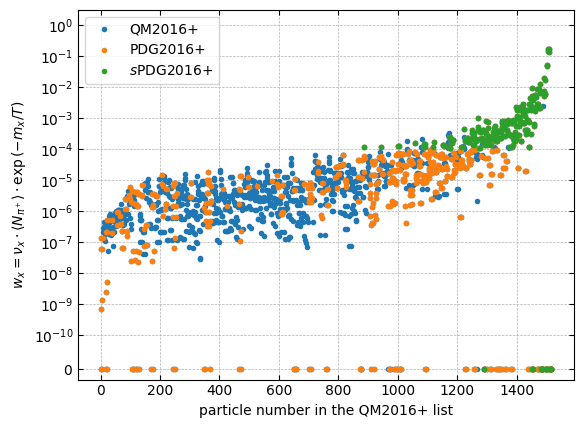

In [53]:
pion_index = 1514  # Index of the pion in particles_df
score_plot = particles_df["Importance Score"].copy()
score_plot[pion_index] = 0
matching_scores_2[pion_index] = 0
matching_scores[pion_index] = 0
plt.plot(score_plot, marker='.', linestyle='None', label='QM2016+')
plt.plot(matching_scores, marker='.', linestyle='None', label='PDG2016+')
plt.plot(matching_scores_2, marker='.', linestyle='None', label=r'$\it{s}$PDG2016+')
plt.xlabel("particle number in the QM2016+ list")
plt.ylabel(r"$w_x = \nu_x \cdot \langle N_{\pi^+} \rangle \cdot \exp{(-m_x / T)}$")
plt.yscale('symlog', linthresh=1e-10)
plt.ylim(-3e-11, 3e0)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tick_params(which="both", direction="in", top=True, right=True)
plt.legend()
#plt.show()
plt.savefig("Plots/ImportanceScore/importance_score_final.pdf", dpi = 300)

## Mass and widths in Dataframe

/tmp/ipykernel_239028/3905944464.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  masses[f0_index] = 0.450  # Set mass of f0(500) to 450 MeV for visualization
/tmp/ipykernel_239028/3905944464.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  widths[f0_index] = 0.550  # Set width of f0(500) to 550 MeV for visualization


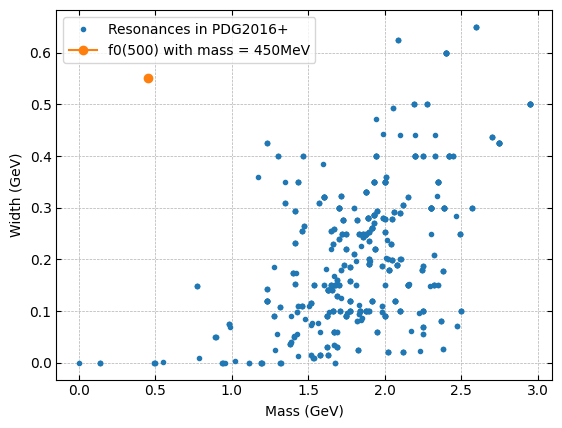

In [8]:
masses = particles_df["Mass (GeV)"]
widths = particles_df["Width (GeV)"]
f0_index = particles_df[particles_df["Name"] == "f0(500)"].index[0]
masses[f0_index] = 0.450  # Set mass of f0(500) to 450 MeV for visualization
widths[f0_index] = 0.550  # Set width of f0(500) to 550 MeV for visualization
names = particles_df["Name"]

plt.plot(masses, widths, marker='.', linestyle='None', label='Resonances in PDG2016+')
plt.plot(masses[f0_index], widths[f0_index], marker='o', label='f0(500) with mass = 450MeV')
plt.legend()
plt.xlabel("Mass (GeV)")
plt.ylabel("Width (GeV)")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tick_params(which="both", direction="in", top=True, right=True)
#plt.show()
plt.savefig("Plots/Widths/mass_width_scatter.png", dpi = 300)

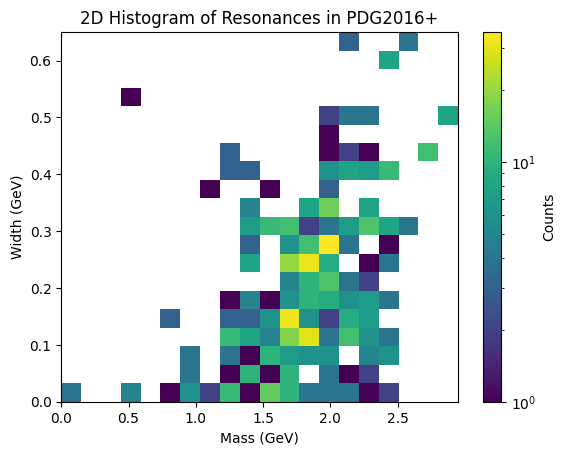

In [9]:
plt.hist2d(masses, widths, bins=20, norm='log')
plt.colorbar(label="Counts")
plt.xlabel("Mass (GeV)")
plt.ylabel("Width (GeV)")
plt.title("2D Histogram of Resonances in PDG2016+")
#plt.show()
plt.savefig("Plots/Widths/mass_width_hist2d.png", dpi = 300)

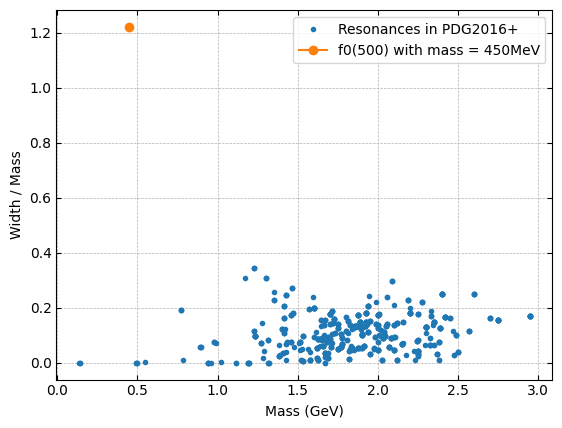

In [10]:
ratio = widths / masses
plt.plot(masses, ratio, marker='.', linestyle='None', label='Resonances in PDG2016+')
plt.plot(masses[f0_index], ratio[f0_index], marker='o', label='f0(500) with mass = 450MeV')
plt.legend()
plt.xlabel("Mass (GeV)")
plt.ylabel("Width / Mass")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tick_params(which="both", direction="in", top=True, right=True)
#plt.show()
plt.savefig("Plots/Widths/mass_width_ratio.png", dpi = 300)

In [ ]:
with open("Widths/masses_width.txt", "w") as f:
    f.write("# Name\tMass (GeV)\tWidth (GeV)\n")
    for name, mass, width in zip(names, masses, widths):
        f.write(f"{name}\t{mass:.6f}\t{width:.6f}\n")

### Cutting with Importance Score

In [8]:
particles_df_cut, decays_df_cut = parser.delete_particle_list_helper(all_important_particles_unique, particles_df, decays_df)

print("Particles DataFrame:")
print(particles_df_cut.head(n=5))
print()
print(f"total number of particles : {len(particles_df_cut)}")

print("\nDecays DataFrame:")
print(decays_df_cut.head(n=5))
print()
print(f"total number of decays : {len(decays_df_cut)}")

Particles DataFrame:
        ID                Name  Mass (GeV)  Width (GeV)  Degeneracy  Baryon no.  Strangeness no.  Charm no.  Bottom no.  Isospin  Charge  No. of decay channels  Importance Score
0  5000003  etaprime(2085)1(0)       2.085          0.0           1           0                0          0           0      0.0       0                     38      1.000000e+00
1  5000002       eta(2073)1(0)       2.073          0.0           1           0                0          0           0      0.0       0                     38      7.896454e-07
2  5000041         f(2066)7(0)       2.066          0.0           7           0                0          0           0      0.0       0                     39      5.669062e-06
3  5000029         f(2048)5(0)       2.048          0.0           5           0                0          0           0      0.0       0                     39      4.450998e-06
4  5000015         f(2039)3(0)       2.039          0.0           3           0          

In [12]:
# Output path
# output_path = f"cuts_test/decays_PDG2016Plus_massorder_{cut}.dat"

# parser.parse_to_dat(output_path, particles_df_cut, decays_df_cut)

## Running mass cuts 

In [13]:
# print(test_list)
# print("\nParticles DataFrame:")
# print(particles_df.head(n=3))
# print("\nDecays DataFrame:")
# print(decays_df.head(n=3))

In [14]:
# parser.mass_list(particles_df, decays_df, 5)

# parser.mass_lists_routine(test_list, dir_name="cuts_study/cuts_mass")
# reverser.reverser_routine(test_list, dir_name="cuts_study/cuts_mass", cut_name=False)